In [3]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics

# Clean up the notebook
clean_notebook()



Notebook cleaned.


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/keshabkkumar/yolo-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tuchsanai


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/keshabkkumar/yolo-datasets


100%|██████████| 11.0M/11.0M [00:01<00:00, 6.19MB/s]

In [7]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
Setup complete ✅ (256 CPUs, 2015.7 GB RAM, 263.7/3519.1 GB disk)


# Apply images


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 224x320 6 persons, 1 sports ball, 41.7ms
Speed: 3.7ms preprocess, 41.7ms inference, 399.4ms postprocess per image at shape (1, 3, 224, 320)


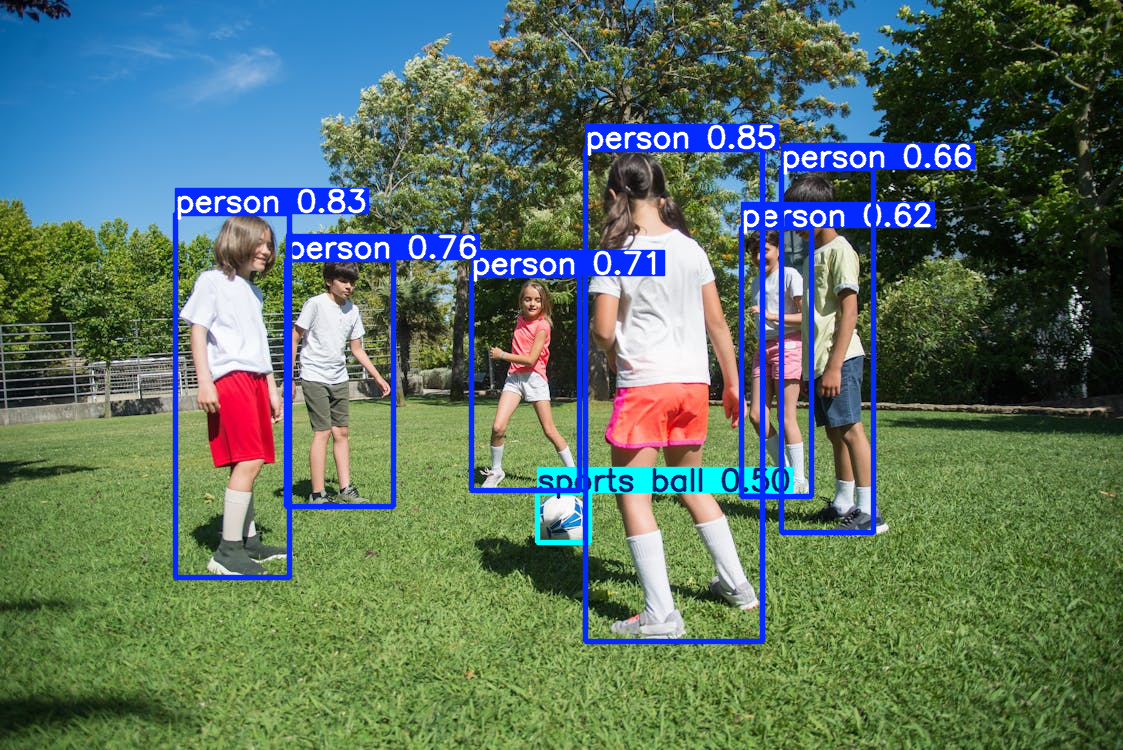

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

In [9]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  0.,  0.,  0., 32.], device='cuda:0')
conf: tensor([0.8462, 0.8328, 0.7647, 0.7131, 0.6570, 0.6155, 0.4961], device='cuda:0')
data: tensor([[5.8600e+02, 1.4934e+02, 7.6223e+02, 6.4168e+02, 8.4621e-01, 0.0000e+00],
        [1.7563e+02, 2.1308e+02, 2.8983e+02, 5.7702e+02, 8.3283e-01, 0.0000e+00],
        [2.8614e+02, 2.5916e+02, 3.9362e+02, 5.0655e+02, 7.6469e-01, 0.0000e+00],
        [4.7108e+02, 2.7553e+02, 5.7946e+02, 4.9067e+02, 7.1313e-01, 0.0000e+00],
        [7.8121e+02, 1.6882e+02, 8.7371e+02, 5.3266e+02, 6.5696e-01, 0.0000e+00],
        [7.4178e+02, 2.2775e+02, 8.1130e+02, 4.9651e+02, 6.1545e-01, 0.0000e+00],
        [5.3701e+02, 4.9247e+02, 5.8976e+02, 5.4259e+02, 4.9609e-01, 3.2000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (750, 1123)
shape: torch.Size([7, 6])
xywh: tensor([[674.1128, 395.5087, 176.2328, 492.3468],
        [232.7332, 395.0504, 114.1997, 363.9389],
        [

# Apply with Open CV


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 1 sports ball, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


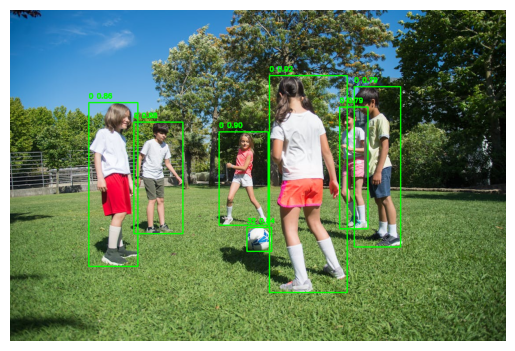

In [10]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg")

# Load the image using OpenCV
image = cv2.imread("./yolo-datasets/YOLO Datasets/test.jpeg")

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    
    # Loop through each box
    for box in boxes:
        # Extract the coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integers
        
        # Draw the rectangle on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with 2px thickness

        # Convert class and confidence to Python types
        class_id = int(box.cls[0]) if hasattr(box.cls, '__iter__') else int(box.cls)
        confidence = float(box.conf[0]) if hasattr(box.conf, '__iter__') else float(box.conf)
        
        # Optionally, add a label or confidence score
        label = f"{class_id} {confidence:.2f}"  # Class and confidence
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the BGR image to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.show()




# Segmentation


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 224x320 6 persons, 14.8ms
Speed: 0.6ms preprocess, 14.8ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 320)


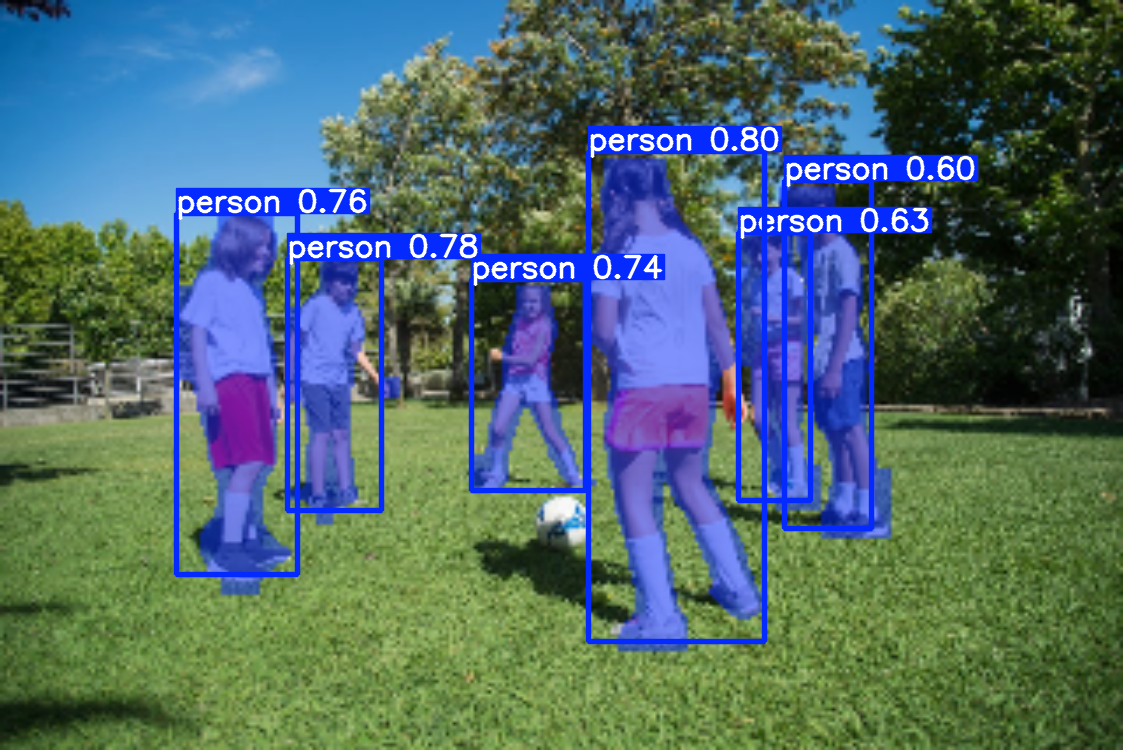

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

# Pose Estimation


image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 224x320 6 persons, 18.4ms
Speed: 0.6ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 320)


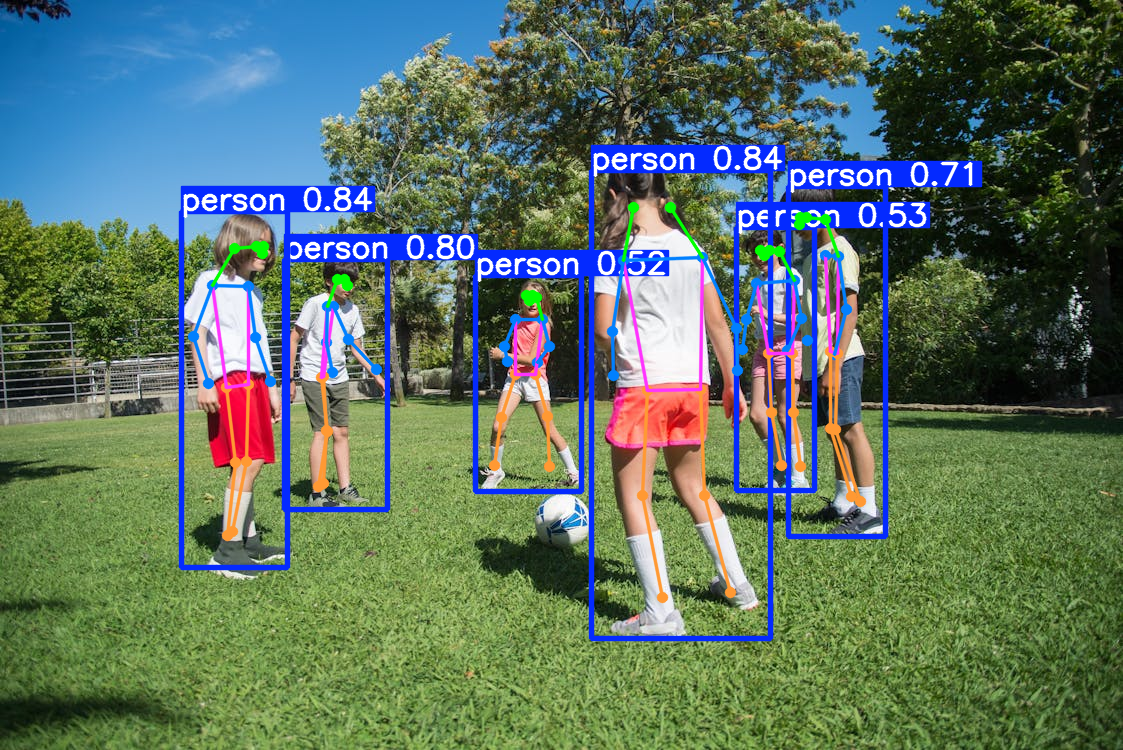

In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.pt")

# Perform object detection on an image
results = model("./yolo-datasets/YOLO Datasets/test.jpeg", imgsz= 320)
results[0].show()

# Pose Estimation with opencv

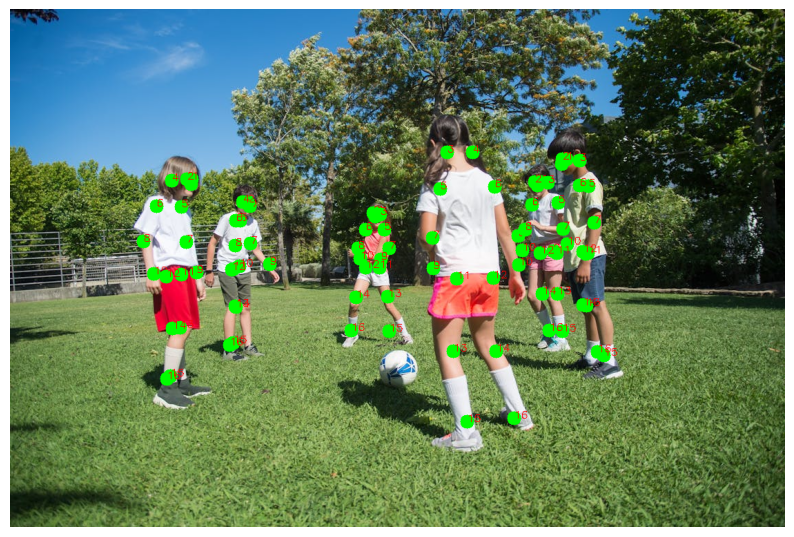

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("./yolo-datasets/YOLO Datasets/test.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
   
    for idx, keypoint in enumerate(person):
        x, y, confidence = keypoint
        if confidence > 0.5:  # Draw only if confidence is above a threshold
            cv2.circle(image_rgb, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=-1)
            cv2.putText(image_rgb, str(idx), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [15]:
person.shape

(17, 3)

In [16]:
person

array([[      529.2,      300.02,     0.77161],
       [     532.45,      295.22,     0.71288],
       [     526.12,      295.52,     0.67265],
       [     536.94,      297.36,     0.55266],
       [          0,           0,     0.44407],
       [     542.94,      319.28,     0.98115],
       [     515.03,      319.42,     0.97891],
       [     549.58,      346.59,     0.91586],
       [     504.57,      346.25,     0.87924],
       [     537.73,       362.6,     0.87311],
       [     507.92,      361.76,     0.83599],
       [     535.77,      374.88,     0.98543],
       [     515.15,      374.81,     0.98399],
       [     547.49,      416.76,     0.97825],
       [     501.68,      417.44,     0.97518],
       [     549.77,      466.45,     0.95919],
       [     494.47,      465.94,      0.9555]], dtype=float32)

# Pose Skeleton connections

```
skeleton = [
    (0, 1), (1, 2), (2, 3), (3, 4),      # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),      # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12), # Right leg
    (0, 13), (13, 14), (14, 15), (15, 16) # Left leg
]

```

100%|██████████| 6.52M/6.52M [00:00<00:00, 147MB/s]



image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


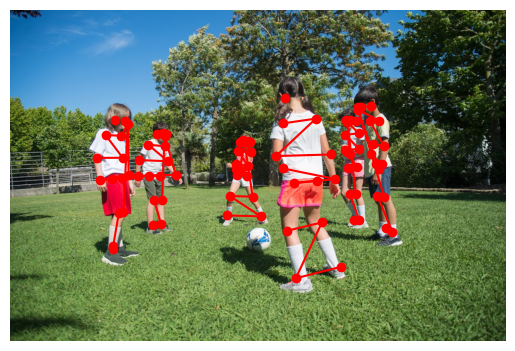

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from ultralytics import YOLO

# Load the YOLO pose estimation model
model = YOLO("yolov8n-pose.pt")  # Ensure you have the correct model file

# Perform inference on the input image
image_path = "./yolo-datasets/YOLO Datasets/test.jpeg"
results = model(image_path)

# Load the original image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the skeleton connections based on COCO keypoints
skeleton = [
    (0, 1), (1, 2), (2, 3), (3, 4),      # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),      # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12), # Right leg
    (0, 13), (13, 14), (14, 15), (15, 16) # Left leg
]

# Create a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(image_rgb)

# Iterate over detected persons
for person in results[0].keypoints.data.cpu().numpy():
    keypoints = person[:, :2]  # Extract (x, y) coordinates
    confidences = person[:, 2]  # Extract confidence scores

    # Plot keypoints
    for i, (x, y) in enumerate(keypoints):
        if confidences[i] > 0.5:  # Plot only if confidence is above threshold
            ax.plot(x, y, 'ro')  # Red dot for keypoint

    # Plot skeleton connections
    for joint_start, joint_end in skeleton:
        if confidences[joint_start] > 0.5 and confidences[joint_end] > 0.5:
            x_start, y_start = keypoints[joint_start]
            x_end, y_end = keypoints[joint_end]
            ax.plot([x_start, x_end], [y_start, y_end], 'r-')  # Red line for skeleton

# Remove axis labels
ax.axis('off')

# Display the result
plt.show()
